# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combined = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')

# Display the data table for preview
data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice.
mouse_array = data_combined["Mouse ID"].unique()
len(mouse_array)

249

In [102]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = data_combined.duplicated()
print(data_combined[duplicate])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [103]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data_combined[data_combined['Mouse ID'] == "g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_combined[data_combined['Mouse ID'] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [105]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_array = clean_data["Mouse ID"].unique()
clean_mouse_count = len(clean_mouse_array)
clean_mouse_count

248

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Find Mean of each Drug's Tumor Volume

tumor_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#Find Median

tumor_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#Find Variance

tumor_variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#Find Std Dev

tumor_std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#Find SEM

tumor_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


#Assemble table
summary_stat_table = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_std, tumor_sem], axis=1)
summary_stat_table.columns.values[0] = "Mean Tumor Volume"
summary_stat_table.columns.values[1] = "Median Tumor Volume"
summary_stat_table.columns.values[2] = "Tumor Volume Variance"
summary_stat_table.columns.values[3] = "Tumor Volume Std. Dev."
summary_stat_table.columns.values[4] = "Tumor Volume SEM"

summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

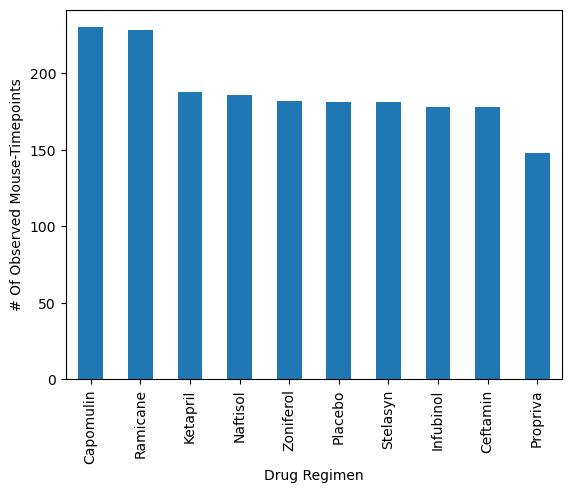

In [107]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Define data
bar_data = clean_data['Drug Regimen'].value_counts()

#Plot the graph
bar_data.plot(kind='bar', legend = False)

# Label axes
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse-Timepoints')

# Show bar graph
plt.show()

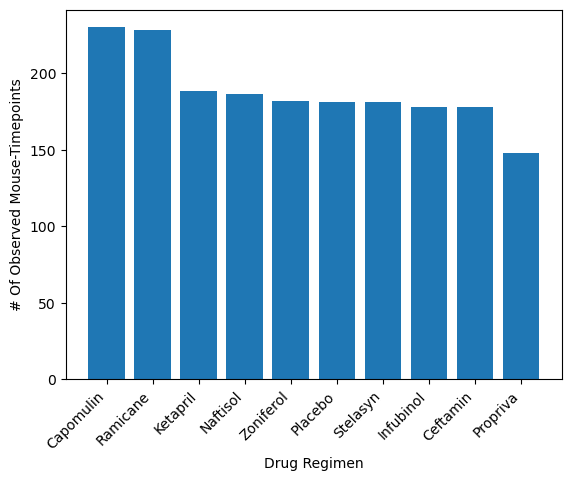

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data = clean_data['Drug Regimen'].value_counts()

# Plot and label axes
plt.bar(bar_data.index, bar_data)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse-Timepoints')
plt.xticks(rotation=45, ha='right')#Rotate x-axis labels

#Show the bar graph
plt.show()

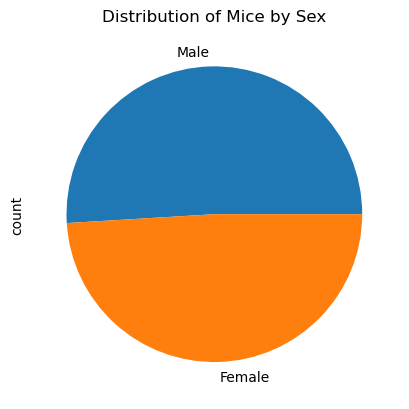

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Define the data
pie_data = clean_data['Sex'].value_counts()

#Plot the pie graph
pie_data.plot(kind='pie')
plt.title('Distribution of Mice by Sex')

plt.show()

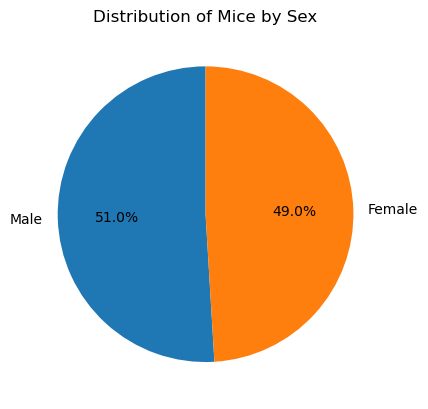

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Define the data
pie_data = clean_data['Sex'].value_counts()

#Plot the pie graph
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mice by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_by_timepoint = clean_data.groupby('Mouse ID')['Timepoint']
last_timepoints = mouse_by_timepoint.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = pd.merge(clean_data, last_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [177]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
              "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [[] for treatment in treatments]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
grouped_merged = merged_data.groupby('Drug Regimen')
for treatment, group_df in grouped_merged:
    first_quartile = group_df['Tumor Volume (mm3)'].quantile(.25)
    third_quartile = group_df['Tumor Volume (mm3)'].quantile(.75)
    iqr = third_quartile - first_quartile
    print(f"The interquartile range for {treatment} is {iqr}")


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_data.iterrows():
    drug_index = treatments.index(row["Drug Regimen"])
    tumor_vol[drug_index].append(row['Tumor Volume (mm3)'])

    # add subset < Not sure what was meant here so i left it blank - Dani

    #Determine outliers using upper and lower bounds

for treatment, group_df in grouped_merged:
    first_quartile = group_df['Tumor Volume (mm3)'].quantile(.25)
    third_quartile = group_df['Tumor Volume (mm3)'].quantile(.75)
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - (1.5 * iqr)
    upper_bound = third_quartile + (1.5 * iqr)
    #print(f"The upper bound of {treatment} is {upper_bound}")
    #print(f"The lower bound of {treatment} is {lower_bound}")
    outliers = group_df.loc[(group_df['Tumor Volume (mm3)'] < lower_bound) | (group_df["Tumor Volume (mm3)"]> upper_bound)]
    #print(f"The outliers of {treatment} is {outliers['Tumor Volume (mm3)']}")

print('')   
print("Only Infubinol has an outlier: 36.21346")

The interquartile range for Capomulin is 7.781863460000004
The interquartile range for Ceftamin is 15.577752179999997
The interquartile range for Infubinol is 11.477135160000003
The interquartile range for Ketapril is 13.152155339999993
The interquartile range for Naftisol is 17.484110670000007
The interquartile range for Placebo is 15.191386480000006
The interquartile range for Propriva is 13.569628922499994
The interquartile range for Ramicane is 9.098536719999998
The interquartile range for Stelasyn is 16.62734878500001
The interquartile range for Zoniferol is 16.805853529999993

Only Infubinol has an outlier: 36.21346


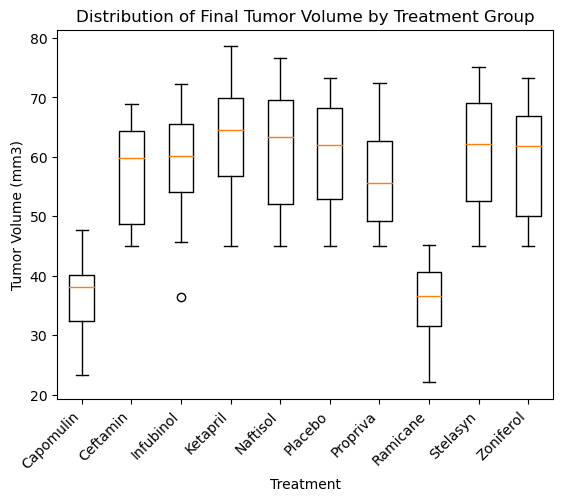

In [178]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1= plt.subplots()
ax1.set_title('Distribution of Final Tumor Volume by Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatment')
ax1.boxplot(tumor_vol)
ax1.set_xticklabels(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
              "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = 45, ha = 'right')
plt.show()

## Line and Scatter Plots

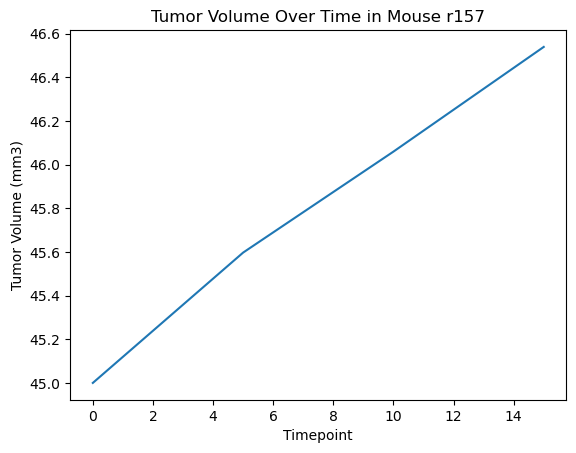

In [179]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mighty_mouse = 'r157'
one_mouse_dataset = clean_data[clean_data['Mouse ID'] == mighty_mouse]

x_axis = one_mouse_dataset['Timepoint']
y_axis = one_mouse_dataset['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time in Mouse {mighty_mouse}')
plt.show()

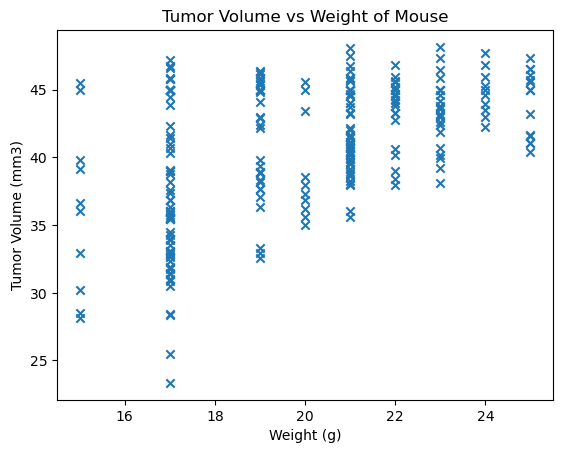

In [132]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_dataset = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

x_axis = capomulin_dataset['Weight (g)']
y_axis = capomulin_dataset['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis, marker = 'x')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight of Mouse')
plt.show()


## Correlation and Regression

The correlation coefficient of mouse weight and average observed tumor volume for the Capomulin region is 0.5256995552077166.


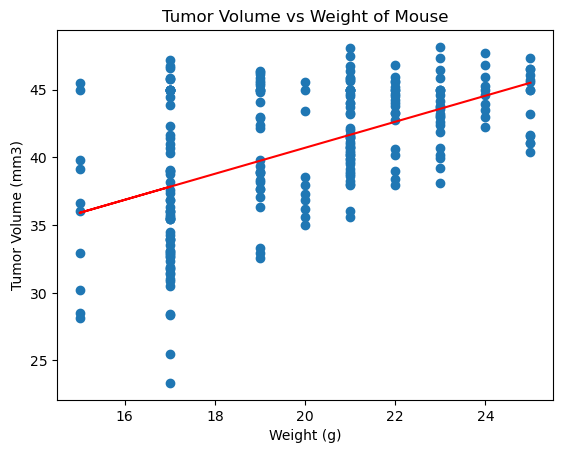

In [136]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Correlation coefficient
correlation_coefficient = x_axis.corr(y_axis)
print(f"The correlation coefficient of mouse weight and average observed tumor volume for the Capomulin region is {correlation_coefficient}.")

#Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight of Mouse')
plt.show()
